# Rosenbrock Function

For a solution to the Rosenbrock function minimization problem using a Python script instead of a notebook, see the [Python script documentation](../scripts/rosenbrock.rst).

## Description

YAPSS is primarily an optimal control problem solver, but can solve parameter optimization problems as well — a parameter optimization problem is just an optimal control problem with no dynamics!

The cost function to be minimized is the Rosenbrock function <cite data-footcite="Rosenbrock:1960">(Rosenbrock, 1960)</cite>,
$$
J = f(x) = 100 (x_1 - x_0 ^ 2) ^ 2 + (1 - x_0) ^ 2
$$
is a function often used to test optimization algorithms. Because the function is the sum of two squares, it's straightforward to verify that the Rosenbrock function has its global minimum at $x = (1,1)$, since
$$
\begin{aligned}
    f(x) & = 0,\quad x = (1,1) \\
    f(x) & > 0,\quad x \ne (1,1)
\end{aligned}
$$
The global minimum lies in a narrow parabolic-shaped valley, making the minimum difficult to find.

We can make a contour plot of the function using Matplotlib:

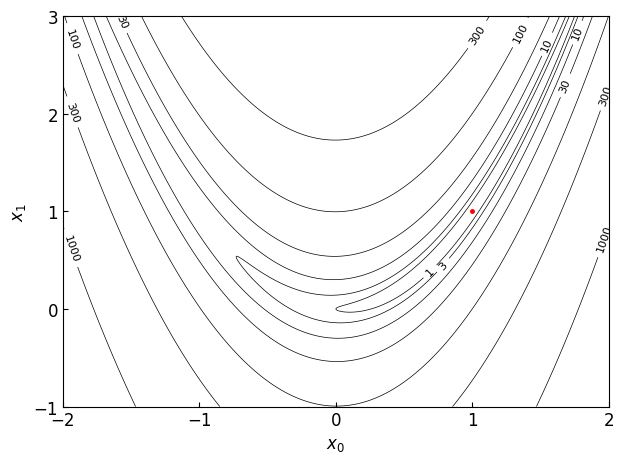

In [1]:
import numpy as np
from matplotlib import pyplot as plt

x0 = np.linspace(-2, 2, 400)
x1 = np.linspace(-1, 3, 400)
x0_grid, x1_grid = np.meshgrid(x0, x1)
f = 100 * (x1_grid - x0_grid**2) ** 2 + (1 - x0_grid) ** 2
levels = [1, 3, 10, 30, 100, 300, 1000, 3000]
cp = plt.contour(x0, x1, f, levels, colors="black", linewidths=0.5)
plt.clabel(cp, inline=1, fontsize=8)
plt.plot(1, 1, ".r", markersize=5)
plt.xlabel(r"$x_0$")
plt.ylabel(r"$x_1$")
plt.xticks(range(-2, 3))
plt.yticks(range(-1, 4))
plt.tight_layout()

The minimum is marked by the red dot in the figure above.

## YAPSS Solution

To find the minimum, first instantiate the problem with no phase and two parameters:

In [2]:
from yapss import Problem

problem = Problem(name="Rosenbrock", nx=[], ns=2)

Define the objective function:

In [3]:
def objective(arg):
    x0, x1 = arg.parameter
    arg.objective = 100 * (x1 - x0**2) ** 2 + (1 - x0) ** 2


problem.functions.objective = objective

Define the initial guess:

In [4]:
problem.guess.parameter = [-2.0, 2.0]

For the optimization, use first and second derivatives of the objective function, found using automatic differentiation. Set the ``tol`` Ipopt option to 1e-10 (default is 1e-8).

In [5]:
problem.derivatives.order = "second"
problem.derivatives.method = "auto"
problem.ipopt_options.tol = 1e-10

Set Ipopt options to control the amount of printout from Ipopt:

In [6]:
# some output, but don't print iterations
problem.ipopt_options.print_level = 3

# suppress the Ipopt banner
problem.ipopt_options.sb = "yes"

# don't print out the Ipopt options
problem.ipopt_options.print_user_options = "no"

All that remains is to solve the problem:

In [7]:
solution = problem.solve()

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0


Number of Iterations....: 26

                                   (scaled)                 (unscaled)
Objective...............:   0.0000000000000000e+00    0.0000000000000000e+00
Dual infeasibility......:   0.0000000000000000e+00    0.0000000000000000e+00
Constraint violation....:   0.0000000000000000e+00    0.0000000000000000e+00
Variable bound violation:   0.0000000000000000e+00    0.0000000000000000e+00
Complementari

We can print out the solution with the code:

In [8]:
print(solution)

<yapss._private.solution.Solution> object
    Name: Rosenbrock
    Ipopt Status Code: 0
    Status Message: Optimal Solution Found
    Objective Value: 0.0


In [9]:
x_opt = solution.parameter
print(f"The optimal solution is at the point x = {x_opt}")

The optimal solution is at the point x = [1. 1.]


## References